# 08. 控制门

下面介绍一个例子——控制Z门（CZ门）：

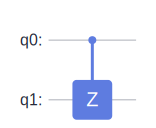

In [1]:
from mindquantum.core.gates import Z
from mindquantum.core.circuit import Circuit

circ = Circuit()
circ += Z.on(1, 0)
circ.svg()

这个门的作用是：
1. 当控制比特q0为1时，对目标比特q1作用Z门；
2. 当控制比特q0为0时，不做任何操作；

也就是说：
$$
\begin{align*}
|00\rangle & \rightarrow |00\rangle \\
|01\rangle & \rightarrow |01\rangle \\
|10\rangle & \rightarrow |10\rangle \\
|11\rangle & \rightarrow -|11\rangle
\end{align*}
$$

写成矩阵形式：
$$
\mathcal{U}_{CZ} = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1
\end{bmatrix}
$$

CZ门具有一个性质，交换控制比特和目标比特后，作用效果不变。

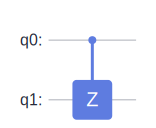

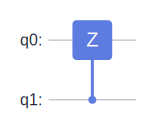

True


In [2]:
from mindquantum.core.gates import Z
from mindquantum.core.circuit import Circuit
from IPython.display import display_svg
import numpy as np

circ1 = Circuit()
circ1 += Z.on(1, 0)
display_svg(circ1.svg())

circ2 = Circuit()
circ2 += Z.on(0, 1)
display_svg(circ2.svg())

print(np.allclose(circ1.matrix(), circ2.matrix()))

我们可以使用 CZ 门和 Hadamard 门来实现 CNOT 门。

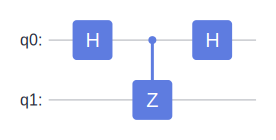

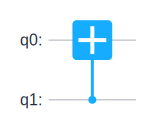

True


In [3]:
from mindquantum.core.gates import Z, H, CNOT
from mindquantum.core.circuit import Circuit
from IPython.display import display_svg
import numpy as np

circ1 = Circuit()
circ1 += H.on(0)
circ1 += Z.on(1, 0)
circ1 += H.on(0)
display_svg(circ1.svg())

circ2 = Circuit()
circ2 += CNOT.on(0, 1)
display_svg(circ2.svg())

print(np.allclose(circ1.matrix(), circ2.matrix()))

# 控制U门

CZ门是一种特殊的 $C(U)$ 门，其中 $U = Z$。一般来说，$C(U)$ 门的定义为：
1. 控制比特为1时，对目标比特作用 $U$ 门；
2. 控制比特为0时，不作用（作用 $I$ 门）；

## 相位

考虑一种简单情形 $U = e^{i\alpha}I$。

如果仅仅是单量子比特，那么 $e^{i\alpha}$ 作为全局相位，我们可以忽略它（全局相位在物理上没有观测效应）。

如果是 $C(U)$ 二量子比特门，此时就不能忽略掉 $e^{i\alpha}$。不妨设 $|q_1 q_0\rangle$，控制比特是 q0：
$$
\begin{align*}
|00\rangle & \rightarrow |00\rangle \\
|01\rangle & \rightarrow e^{i\alpha}|01\rangle \\
|10\rangle & \rightarrow |10\rangle \\
|11\rangle & \rightarrow e^{i\alpha}|11\rangle
\end{align*}
$$

对于一般的 $|\psi\rangle = a |00\rangle + b |01\rangle + c|10\rangle + d|11\rangle$，作用效果为：
$$
\begin{align*}
|\psi'\rangle
& = a |00\rangle + be^{i\alpha}|01\rangle 
    + c|10\rangle + de^{i\alpha}|11\rangle \\
& = \left[I \otimes \left(|0\rangle \langle 0| + e^{i\alpha} |1\rangle \langle 1|\right) \right] |\psi\rangle
\end{align*}
$$

因此 $C(e^{i\alpha}I)$ 等价于一个单量子比特门。

alpha = 0.9496466347941014


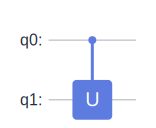

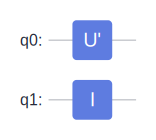

True


In [4]:
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import UnivMathGate, I
from IPython.display import display_svg
import numpy as np
from numpy.random import rand

alpha = rand()
print(f"alpha = {alpha}")

u = UnivMathGate("U", np.array(
    [[np.exp(complex(0, alpha)), 0], 
     [0, np.exp(complex(0, alpha))]]))
circ1 = Circuit()
circ1 += u.on(1, 0)
display_svg(circ1.svg())

p = UnivMathGate("U'", np.array(
    [[1, 0],
     [0, np.exp(complex(0, alpha))]]
))
circ2 = Circuit()
circ2 += p.on(0)
circ2 += I.on(1)
display_svg(circ2.svg())

print(np.allclose(circ1.matrix(), circ2.matrix()))

> API 解释：
> 
> - `UnivMathGate(name, mat)` 通过矩阵 `mat` 声名一个名为 `name` 的量子门。

## 实现 C(U)

根据 lecture7 我们知道 $U = e^{i\alpha}AXBXC$，其中 $ABC = I$。这意味着我们可以用如下的电路实现 $C(U)$ ：

![CU-implement](./images/CU_implement.png)

下面我们证明这件事情：

不妨设 控制比特 $q_0 = a|0\rangle + b|1\rangle$，目标比特 $q_1 = |t\rangle$ 。

左边的线路作用的结果为：
$$C_U |\psi\rangle = a|0\rangle |t\rangle + b|1\rangle U|t\rangle$$

右边的线路一步步的作用结果：
$$
\begin{align*}
|\psi\rangle 
& = a|0\rangle |t\rangle + b|1\rangle |t\rangle \\
& \rightarrow a|0\rangle C|t\rangle + b|1\rangle C|t\rangle \\
& \rightarrow a|0\rangle C|t\rangle + b|1\rangle XC|t\rangle \\
& \rightarrow a|0\rangle BC|t\rangle + b|1\rangle BXC|t\rangle \\
& \rightarrow a|0\rangle BC|t\rangle + b|1\rangle XBXC|t\rangle \\
& \rightarrow a|0\rangle ABC|t\rangle + e^{i\alpha}b|1\rangle AXBXC|t\rangle \\
& = a|0\rangle |t\rangle + b|1\rangle U|t\rangle
\end{align*}
$$

下面对 $C(H)$ 门进行验证。

因为 $H = e^{i\pi\over 2}R_z(0)R_y({\pi\over 2})R_z(\pi)$，所以令
$$
\begin{cases}
A = R_z(\beta)R_y({\gamma\over 2}) \\
B = R_y(-{\gamma\over 2})R_z(-{(\delta+\beta)\over 2}) \\
C = R_z({(\delta-\beta)\over 2})
\end{cases}
$$

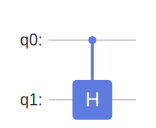

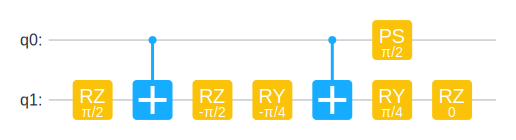

True


In [5]:
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import RZ, RY, RZ, X, H, CNOT
from mindquantum.core.gates import PhaseShift
from IPython.display import display_svg
import numpy as np
from numpy.random import rand

alpha = np.pi / 2
beta = 0
gamma = np.pi / 2
delta = np.pi

circ1 = Circuit()
circ1 += H.on(1, 0)
display_svg(circ1.svg())

# A = RZ(beta) * RY(gamma / 2)
# B = RY(-gamma / 2) * RZ(-(delta + beta) / 2)
# C = RZ((delta - beta) / 2)
circ2 = Circuit()
circ2 += RZ((delta-beta)/2).on(1)
circ2 += CNOT.on(1, 0)
circ2 += RZ(-(delta + beta)/2).on(1)
circ2 += RY(-gamma / 2).on(1)
circ2 += CNOT.on(1, 0)
circ2 += RY(gamma / 2).on(1)
circ2 += RZ(beta).on(1)
circ2 += PhaseShift(alpha).on(0)
display_svg(circ2.svg())

print(np.allclose(circ1.matrix(), circ2.matrix()))

## 拓展的控制门

下面介绍一些常用的记号，用来拓展控制门的功能。

我们使用“实心圆”表示控制比特为“1”时作用，使用“空心圆”表示控制比特为“0”时作用：

![extended-control-gate-1](./images/control_gate_extended.png)

两个线路是等价的，因为
$$
\begin{align*}
& |0\rangle \langle 0| \otimes X + |1\rangle \langle 1| \otimes I \\
= & X |1\rangle \langle 1|X \otimes X + X|0\rangle \langle 0|X\otimes I \\
= & \left(X\otimes I \right) \left(|0\rangle \langle 0| \otimes X + |1\rangle \langle 1|\otimes I\right) \left(X\otimes I\right) 
\end{align*}
$$

使用 MindQuantum 验证：

True


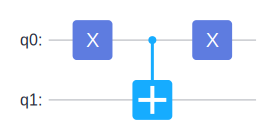

In [6]:
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import X, CNOT, UnivMathGate
import numpy as np

U = UnivMathGate("U", np.array(
    [[0, 0, 1, 0],
     [0, 1, 0, 0],
     [1, 0, 0, 0],
     [0, 0, 0, 1]]
))
circ1 = Circuit()
circ1 += U.on([0, 1])

circ2 = Circuit()
circ2 += X.on(0)
circ2 += CNOT.on(1, 0)
circ2 += X.on(0)
print(np.allclose(circ1.matrix(), circ2.matrix()))
circ2.svg()

我们也可以有多个目标比特，等价于多个单目标比特的作用。

![extended-control-gate-2](./images/control_gate_extended_2.png)

# 多控制比特

如果控制比特数目为 $n$ 个，记作 $C^n(U)$，作用效果如下：
$$C^n(U) |x_1x_2\ldots x_n\rangle |t\rangle = |x_1x_2 \ldots x_n\rangle U^{x_1x_2\cdots x_n}|t\rangle$$
当且仅当 $x_1 = x_2 = \cdots = x_n = 1$ 时，对目标比特作用 $U$ 操作。

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


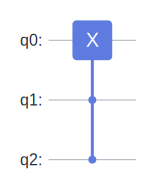

In [7]:
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import X

circ = Circuit([X.on(0, [1, 2])])
print(circ.matrix())
circ.svg()

In [8]:
from show_info import InfoTable

InfoTable('mindquantum', 'numpy')

# 习题

## Exercise 1

使用 H 门来实现 **交换** CNOT 门的控制比特和目标比特。

## Exercise 2

使用 CNOT 和 单量子比特门 来构造 $R_y(\theta)$ 。